# <a id="#">Task 4 – Edge detection: Derivative operators</a>

In [13]:
import numpy
import matplotlib.pyplot as plt
import skimage.io

---

## Prewitt filters

**<a id="#">Task 4.1.1.</a>** Load the image `data/astronaut.png` and show it:

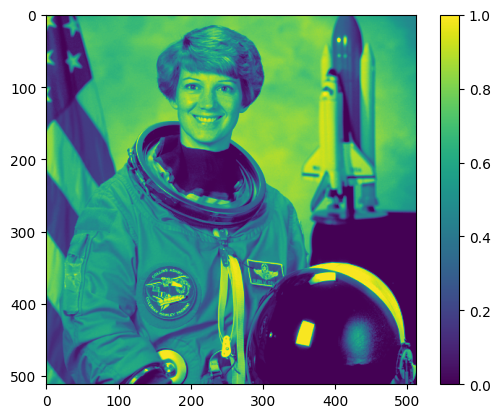

In [51]:
img = plt.imread('data/astronaut.png')
plt.figure()
plt.imshow(img)
plt.colorbar()

**<a id="#">Task 4.1.2.</a>** Implement horizontal and vertical 3&times;3 Prewitt filters:

In [52]:
def prewitt_h(img_in):
    img_in = img_in.astype(float)
    img_out = img_in.copy()
    dis = 1
    for p in numpy.ndindex(img_in.shape): #für alle einzelnen Pixel -> Rand beachten!
        if p[0] >= dis and p[0] < (img_in.shape[0]-dis) and p[1] >= dis and p[1] < (img_in.shape[1]-dis): #für alle Zellen die NICHT am Rand sind - Rand ist jeweils size/2-0,5
            listp = list(p)
            row = listp[0]
            column = listp[1]
            value = (1/6)*(img_in[row-1, column-1]-img_in[row-1, column+1]+img_in[row, column-1]-img_in[row, column+1]+img_in[row+1, column-1]-img_in[row+1, column+1])
            img_out[p] = value
    return img_out
    
def prewitt_v(img_in):
    img_in = img_in.astype(float)
    img_out = img_in.copy()
    dis = 1
    for p in numpy.ndindex(img_in.shape): #für alle einzelnen Pixel -> Rand beachten!
        if p[0] >= dis and p[0] < (img_in.shape[0]-dis) and p[1] >= dis and p[1] < (img_in.shape[1]-dis): #für alle Zellen die NICHT am Rand sind - Rand ist jeweils size/2-0,5
            listp = list(p)
            row = listp[0]
            column = listp[1]
            value = (1/6)*(img_in[row-1, column-1]+img_in[row-1, column]+img_in[row-1, column+1]-(img_in[row+1, column-1]+img_in[row+1, column]+img_in[row+1, column+1]))
            img_out[p] = value
    return img_out

**<a id="#">Task 4.1.3.</a>** Test your above solution using the functions `prewitt_h` and `prewitt_v` for the previously loaded image and show the result:

img_out = prewitt_h(img)
plt.figure()
plt.imshow(img_out)
plt.colorbar()

img_out = prewitt_v(img)
plt.figure()
plt.imshow(img_out)
plt.colorbar()

**<a id="#">Task 4.1.4.</a>** Compare your results with the correct result image `data/astronaut_prewitt_h.tiff` and `data/astronaut_prewitt_v.tiff`:

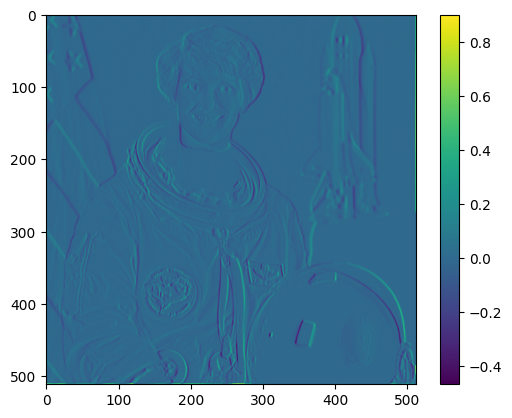

In [53]:
img = plt.imread('data/astronaut.png')
img_out = prewitt_h(img)
plt.figure()
plt.imshow(img_out)
plt.colorbar()

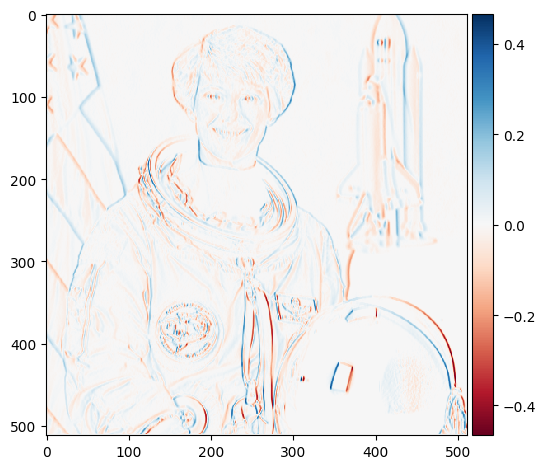

In [54]:
imgh = skimage.io.imread('data/astronaut_prewitt_h.tiff')
skimage.io.imshow(imgh)


In [55]:
assert numpy.allclose(img_out, imgh)

AssertionError: 

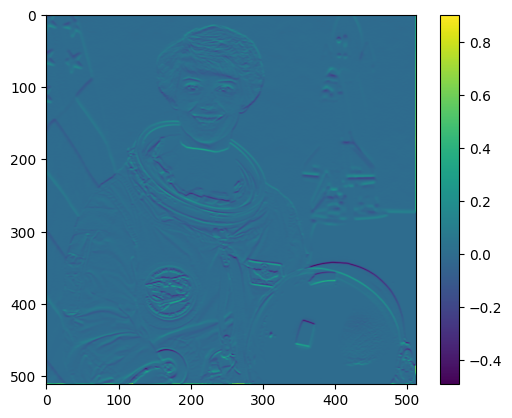

In [ ]:
img = plt.imread('data/astronaut.png')
img_out = prewitt_v(img)
plt.figure()
plt.imshow(img_out)
plt.colorbar()

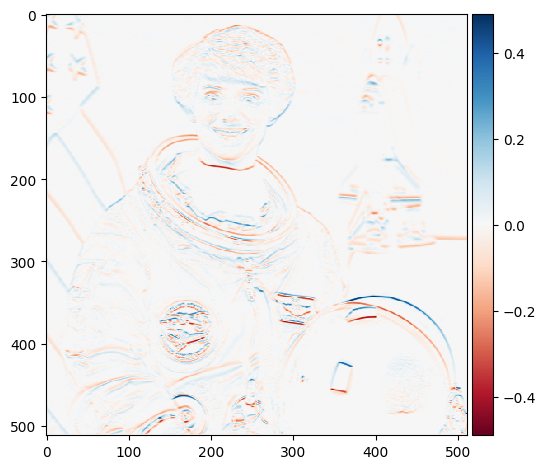

In [ ]:
imgv = skimage.io.imread('data/astronaut_prewitt_v.tiff')
skimage.io.imshow(imgv)

---

## Edge detection

**<a id="#">Task 4.2.1.</a>** Use your results from **Task 4.1.2 – 4.1.3** to compute the *gradient magnitude* of the image:

In [43]:
def edging(img_in):
    img_in = img_in.astype(float)
    img_out = img_in.copy()
    dis = 1
    for p in numpy.ndindex(img_in.shape): #für alle einzelnen Pixel -> Rand beachten!
        if p[0] >= dis and p[0] < (img_in.shape[0]-dis) and p[1] >= dis and p[1] < (img_in.shape[1]-dis): #für alle Zellen die NICHT am Rand sind - Rand ist jeweils size/2-0,5
            listp = list(p)
            row = listp[0]
            column = listp[1]
            gh = (1/6)*(img_in[row-1, column-1]-img_in[row-1, column+1]+img_in[row, column-1]-img_in[row, column+1]+img_in[row+1, column-1]-img_in[row+1, column+1])
            gv = (1/6)*(img[row-1, column-1]+img[row-1, column]+img[row-1, column+1]-(img[row+1, column-1]+img[row+1, column]+img[row+1, column+1]))
            maggrad = numpy.sqrt((gh*gh+gv*gv))
            img_out[p] = maggrad
    return img_out

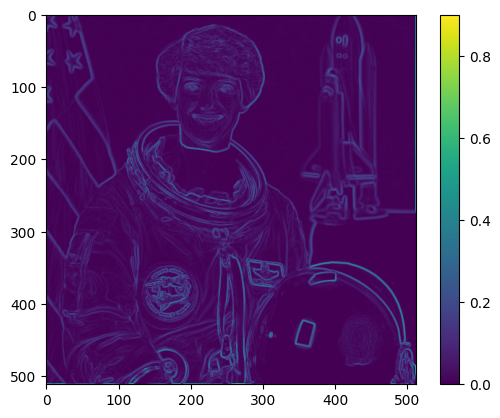

In [47]:
img = plt.imread('data/astronaut.png')
img_out = edging(img)
plt.figure()
plt.imshow(img_out)
plt.colorbar()

**<a id="#">Task 4.2.2.</a>** Compare your result with the correct result image `data/astronaut_prewitt_gradmag.tiff`:

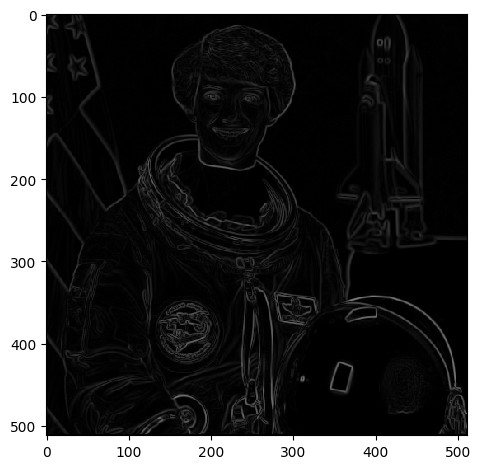

In [36]:
img = skimage.io.imread('data/astronaut_prewitt_gradmag.tiff')
skimage.io.imshow(img)

---

## Sobel filters (bonus)

**<a id="#">Task 4.3.1.</a>** Implement the two functions `sobel_h` and `sobel_v` for horizontal and vertical 3&times;3 Sobel filtering, respectively:

In [48]:
def sobel_h(img_in):
    img_in = img_in.astype(float)
    img_out = img_in.copy()
    dis = 1
    for p in numpy.ndindex(img_in.shape): #für alle einzelnen Pixel -> Rand beachten!
        if p[0] >= dis and p[0] < (img_in.shape[0]-dis) and p[1] >= dis and p[1] < (img_in.shape[1]-dis): #für alle Zellen die NICHT am Rand sind - Rand ist jeweils size/2-0,5
            listp = list(p)
            row = listp[0]
            column = listp[1]
            value = (1/8)*(img_in[row-1, column-1]-img_in[row-1, column+1]+2*img_in[row, column-1]-2*img_in[row, column+1]+img_in[row+1, column-1]-img_in[row+1, column+1])
            img_out[p] = value
    return img_out
    
def sobel_v(img_in):
    img_in = img_in.astype(float)
    img_out = img_in.copy()
    dis = 1
    for p in numpy.ndindex(img_in.shape): #für alle einzelnen Pixel -> Rand beachten!
        if p[0] >= dis and p[0] < (img_in.shape[0]-dis) and p[1] >= dis and p[1] < (img_in.shape[1]-dis): #für alle Zellen die NICHT am Rand sind - Rand ist jeweils size/2-0,5
            listp = list(p)
            row = listp[0]
            column = listp[1]
            value = (1/8)*(img_in[row-1, column-1]+2*img_in[row-1, column]+img_in[row-1, column+1]-(img_in[row+1, column-1]+2*img_in[row+1, column]+img_in[row+1, column+1]))
            img_out[p] = value
    return img_out

**<a id="#">Task 4.3.2.</a>** Test your above solution using the functions `sobel_h` and `sobel_v` for the previously loaded image and show the result:

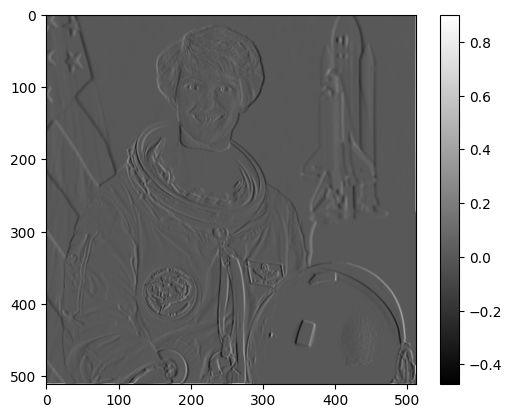

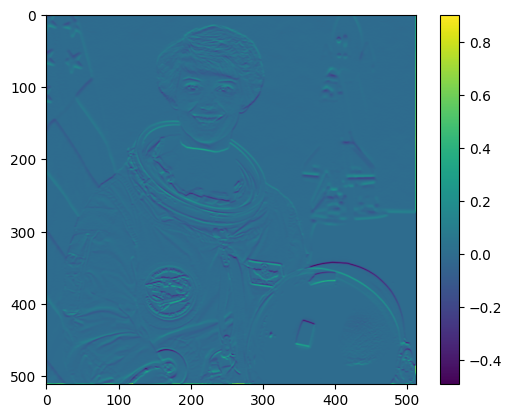

In [59]:
img = plt.imread('data/astronaut.png')
img_out = sobel_h(img)
plt.figure()
plt.imshow(img_out, "gray")
plt.colorbar()
img = plt.imread('data/astronaut.png')
img_out = sobel_v(img)
plt.figure()
plt.imshow(img_out)
plt.colorbar()

**<a id="#">Task 4.3.3.</a>** Compare your results with the correct result image `data/astronaut_sobel_h.tiff` and `data/astronaut_sobel_v.tiff`:

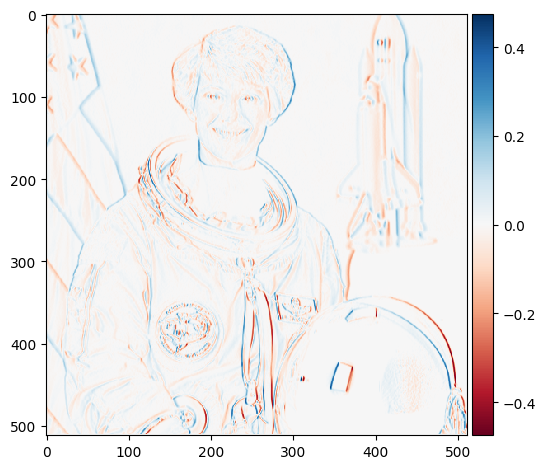

In [67]:
i = skimage.io.imread('data/astronaut_sobel_h.tiff')
skimage.io.imshow(i)
